## Analysis of Harmful Ingredients in Skincare Products and Their Impact on Customer Sentiment and Ratings


### Introduction

The beauty industry is growing rapidly, with ingredients continually evolving to be safer and better for our health. Consumers are increasingly aware of the harmful ingredients used in their products, making it crucial to understand how these potentially harmful substances affect consumer sentiment and product ratings. This project aims to analyze the prevalence of harmful ingredients in skincare products and assess their impact on consumer perceptions and ratings.

In this study, we will:
1. **Identify Harmful Ingredients**: Utilize a reliable database to classify ingredients based on their safety profiles.
2. **Determine Prevalence**: Calculate how common these harmful ingredients are in various skincare products.
3. **Analyze Consumer Sentiment**: Perform sentiment analysis on consumer reviews to gauge awareness and reactions to harmful ingredients.
4. **Evaluate Product Ratings**: Assess how the presence of harmful ingredients affects product ratings.
5. **Correlation Analysis**: Explore the relationship between harmful ingredients, consumer sentiment, and product ratings.
6. **Provide Insights and Recommendations**: Offer actionable recommendations for manufacturers and regulators based on our findings.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Identify Harmful Ingredients

In [6]:
# Load the datasets into dataframe
df_skincare = pd.read_csv('Skincare.csv')
df_ingredients = pd.read_excel('Skincare_Ingredients.xls')
print("Skincare datasets attributes:",df_skincare.dtypes)
print("Skincare ingredients attributes:", df_ingredients.dtypes)


Skincare datasets attributes: Label           object
brand           object
name            object
price            int64
rank           float64
ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object
Skincare ingredients attributes: CAS                              object
List Name                        object
TSCA Chemical Name               object
List Call                        object
Caveat - Chemical Use            object
Edit Description                 object
Date of Edit             datetime64[ns]
dtype: object


In [7]:
df_skincare.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [8]:
df_ingredients.tail()

,CAS,List Name,TSCA Chemical Name,List Call,Caveat - Chemical Use,Edit Description,Date of Edit
752,68605-97-0,"Fatty acids, tallow, hydrogenated, compds. wit...","Fatty acids, tallow, hydrogenated, compds. wit...",Green [Circle],NaN,Chemical added to the list,2012-12-21
753,26590-05-6,"2-Propen-1-aminium, N,N-dimethyl-N-2-propenyl-...","2-Propen-1-aminium, N,N-dimethyl-N-2-propen-1-...",NaN,NaN,Chemical removed from list,2012-12-21
754,68989-22-0,"Zeolites, NaA","Zeolites, NaA",Green [Circle],NaN,Chemical added to the list,2012-12-21
755,1318-02-1,Zeolites,Zeolites,Green [Circle],NaN,Chemical added to the list,2012-12-21
756,27593-14-2,Octyldimethylbetaine,"1-Octanaminium, N-(carboxymethyl)-N,N-dimethyl...",Green [Circle],NaN,Chemical added to the list,2012-12-21


In [9]:
# Clean and preprocess ingredients name in skincare and ingredients dataframe
df_skincare['ingredients'].str.lower().str.strip()


0       algae (seaweed) extract, mineral oil, petrolat...
1       galactomyces ferment filtrate (pitera), butyle...
2       water, dicaprylyl carbonate, glycerin, ceteary...
3       algae (seaweed) extract, cyclopentasiloxane, p...
4       water, snail secretion filtrate, phenyl trimet...
                              ...                        
1467    water, alcohol denat., potassium cetyl phospha...
1468    water, isododecane, dimethicone, butyloctyl sa...
1469    water, dihydroxyacetone, glycerin, sclerocarya...
1470    water, dihydroxyacetone, propylene glycol, ppg...
1471                        visit the dermaflash boutique
Name: ingredients, Length: 1472, dtype: object

In [10]:
df_ingredients['List Name'].str.lower().str.strip()

0                                       chitosan acetate
1                                      sodium levulinate
2                             halogenated aliphatic acid
3      fats and glyceridic oils, vegetable, hydrogenated
4                                            tocopherols
                             ...                        
752    fatty acids, tallow, hydrogenated, compds. wit...
753    2-propen-1-aminium, n,n-dimethyl-n-2-propenyl-...
754                                        zeolites, naa
755                                             zeolites
756                                 octyldimethylbetaine
Name: List Name, Length: 757, dtype: object

In [11]:
# Define labels that indicate harmful ingredients
harmful_labels = ['Yellow [Triangle]','Gray [Square]','Grey [Square]']


In [12]:
# Create list of ingredients that are classified as harmful
harmful_ingredients = set(df_ingredients[df_ingredients['List Call'].isin(harmful_labels)]['List Name'])
print(list(harmful_ingredients))


['Sodium acid pyrophosphate', 'Amyl salicylate', 'Cyclohexanepropanol, 2,2,6-trimethyl-.alpha.-propyl-', 'Soybean oil, methyl esters', 'Oxacyclohexadec-12-en-2-one, (12E)-', 'Methyl delta-ionone', 'Methyl delta ionone', 'Diethylenetriaminepenta(methylenephosphonic acid), sodium salt', 'Undecanal, 2-methyl-', '9-Decen-1-ol', 'Amyl acetate', 'Boron, trifluoro(tetrahydrofuran)-, (T-4)-, polymer with 3-methyl-3-[(2,2,3,3,3-pentafluoropropoxy)methyl]oxetane, ether with 2,2-dimethyl-1,3-propanediol (2:1), bis(hydrogen sulfate), diammonium salt', 'Dimethyl tetrahydrobenzaldehyde', 'Disulfurous acid, disodium salt', 'Diphenyl oxide', 'Boron trioxide', 'Cyclopentanone, 2-pentyl-', 'Methyl oleate', 'Isopulegol', 'Disodium octaborate tetrahydrate', '.beta.-Cyclodextrin, 2-hydroxypropyl ethers', 'Acetone', 'Pectate lyase', '2(3H)-Naphthalenone, 4,4a,5,6,7,8-hexahydro-4,4a-dimethyl-6-(1-methylethenyl)-, (4R,4aS,6R)-', 'C.I. Acid Violet 48', 'alpha-Terpineol', 'Eucalyptol', 'C.I. Pigment Yellow 100'

### Determine Prevalence of Harmful Ingredients in Skincare Products

In [13]:
# Create function to filter harmful ingedients in skincare dataframe
def contains_harmful_ingredients(ingredient_list, harmful_ingredients):
    # Split ingredients into a list of individual ingredients
    # Use strip to remove any whitespace
    ingredients = [ingredient.strip() for ingredient in ingredient_list.split(',')]
    # Check for harmful ingredients
    return any(ingredient in harmful_ingredients for ingredient in ingredients)


In [14]:
# Apply the function to the skincare dataframe
df_skincare['Has Harmful Ingredients'] = df_skincare['ingredients'].apply(contains_harmful_ingredients, args=(harmful_ingredients,))
print(df_skincare)


            Label                          brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   name  price  rank  \
0                                       Crème de la Mer    175   4.1   
1                              Facial Treatment Essence    179   4.1   
2                            Protini™ Polypeptide Cream     68   4.4   
3                           The Moisturizing Soft Cream    175   3.8   
4         Your 

In [15]:
# Calculate the total number of products and the number with harmful ingredients to find the prevalence.
# Total products
total_products = len(df_skincare)
print(f"Total number of skincare products: {total_products}")

# Total products with harmful ingredients
products_with_harmful_ingredients = df_skincare['Has Harmful Ingredients'].sum()
print(f"Total number of skincare products with harmful ingredients:{products_with_harmful_ingredients}")

# Calculate the prevalence of products with harmful ingredients
prevalence_of_harmful_ingredients = (products_with_harmful_ingredients / total_products)*100
print(f"Prevalence of harmful ingredients:{prevalence_of_harmful_ingredients:.2f}%")

Total number of skincare products: 1472
Total number of skincare products with harmful ingredients:863
Prevalence of harmful ingredients:58.63%


### Analyze Consumer Sentiment

In [16]:
# Classify ratings into sentiment categories
# Positive: Ratings 4.0-5.0
# Neutral: Ratings 3.0 - 3.9
# Negative: Ratings 0 - 2.9

def classify_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif 3 <= rating < 4:
        return 'Neutral'
    else:
        return 'Negative'
    
# Apply function to skincare dataframe
df_skincare['Sentiment'] = df_skincare['rank'].apply(classify_rating)
print(df_skincare.head())


         Label           brand                                           name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   price  rank                                        ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  Has Harmful Ingredients  \
0            1    1      

In [17]:
#Calculate the sentiment distribution for products with and without harmful ingredients
#Filter dataframe for products with and without harmful ingredients

with_harmful_ingredients = df_skincare[df_skincare['Has Harmful Ingredients'] == True]
without_harmful_ingredients = df_skincare[df_skincare['Has Harmful Ingredients'] == False]

print("Products with harmful ingredients are:", with_harmful_ingredients)
print("Products without harmful ingredients:", without_harmful_ingredients)

Products with harmful ingredients are:             Label                          brand  \
0     Moisturizer                         LA MER   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
6     Moisturizer                 DRUNK ELEPHANT   
...           ...                            ...   
1464  Sun protect                   IT COSMETICS   
1466  Sun protect                KATE SOMERVILLE   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   

                                                   name  price  rank  \
0                                       Crème de la Mer    175   4.1   
2                            Protini™ Polypeptide Cream     68   4.4   
3                           The Moisturizing Soft Cream    175   3.8   
4         Your Skin But Better™ CC+™ Cream with 

In [18]:
#Normalize the sentiment with percentage
sentiment_distribution_with = with_harmful_ingredients['Sentiment'].value_counts(normalize = True)*100
sentiment_distribution_without = without_harmful_ingredients['Sentiment'].value_counts(normalize = True)*100
print("Sentiment distribution with harmful ingredients:", sentiment_distribution_with)
print("Sentiment distribution without harmful ingredients:", sentiment_distribution_without)

Sentiment distribution with harmful ingredients: Sentiment
Positive    74.044032
Neutral     23.638470
Negative     2.317497
Name: proportion, dtype: float64
Sentiment distribution without harmful ingredients: Sentiment
Positive    80.295567
Neutral     17.898194
Negative     1.806240
Name: proportion, dtype: float64


In [19]:
# Visualize the sentiment distribution for products with and without harmful ingredients
# Assuming both sentiment distributions not in numpy arrays
labels = sentiment_distribution_with.index.tolist()
with_values = sentiment_distribution_with.values
without_values = sentiment_distribution_without.values

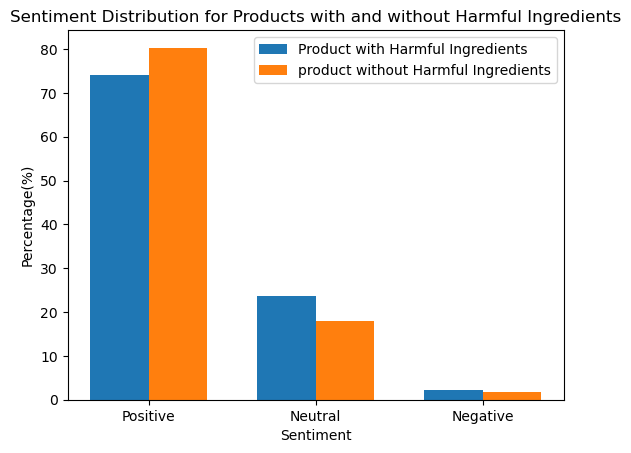

In [20]:
#Plotting
x = np.arange(len(labels)) #label location
width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, with_values, width, label="Product with Harmful Ingredients")
rect2 = ax.bar(x + width/2, without_values, width, label="product without Harmful Ingredients")

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage(%)')
ax.set_title('Sentiment Distribution for Products with and without Harmful Ingredients')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


### Evaluate Product Ratings

In [21]:
# Calculate average rating of products
with_harmful_ingredients = df_skincare[df_skincare['Has Harmful Ingredients'] == True]
avg_rating_with_harmful = with_harmful_ingredients['rank'].mean()
print("Average rating for products with harmful ingredients:", avg_rating_with_harmful)

without_harmful_ingredients = df_skincare[df_skincare['Has Harmful Ingredients'] == False]
avg_rating_without_harmful = without_harmful_ingredients['rank'].mean()
print("Average rating for products without harmful ingredients:", avg_rating_without_harmful)


Average rating for products with harmful ingredients: 4.125492468134414
Average rating for products without harmful ingredients: 4.192610837438424


In [22]:
# Perform t-test to check whether the difference in ratings statistically significant
from scipy.stats import ttest_ind

ratings_with_harmful = df_skincare[df_skincare['Has Harmful Ingredients'] == True]['rank']
ratings_without_harmful = df_skincare[df_skincare['Has Harmful Ingredients'] == False]['rank']

t_stat, p_value = ttest_ind(ratings_with_harmful, ratings_without_harmful, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.0361688237399247
P-value: 0.04192394126115057


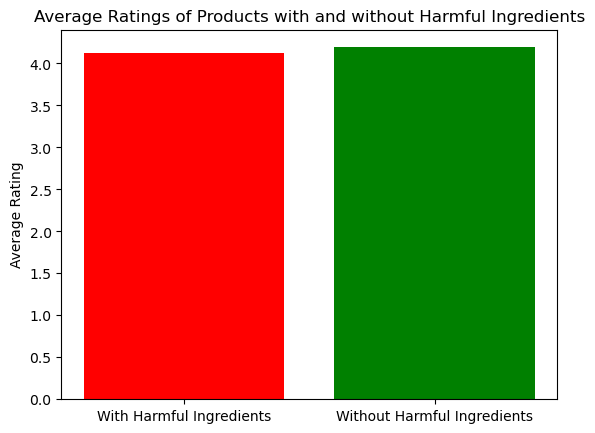

In [23]:
# Visualize the average rating of products with and without harmful ingredients
labels = ['With Harmful Ingredients', 'Without Harmful Ingredients']
avg_ratings = [avg_rating_with_harmful, avg_rating_without_harmful]

fig, ax = plt.subplots()
ax.bar(labels, avg_ratings, color=['red', 'green'])

ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings of Products with and without Harmful Ingredients')

plt.show()

### Summary From Product Ratings Evaluation

1. The average rating for products with harmful ingredients: 4.125
2. The average rating for products without harmful ingredients: 4.193
3. T-statistic: -2.036
4. P-value: 0.042

### Visualization and Reporting

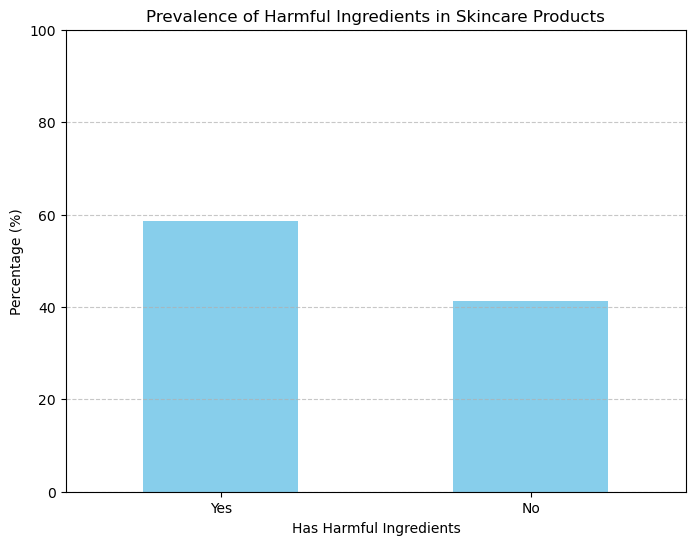

In [24]:
# Plotting the prevalence
prevalence_data = df_skincare['Has Harmful Ingredients'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
prevalence_data.plot(kind='bar', color='skyblue')
plt.title('Prevalence of Harmful Ingredients in Skincare Products')
plt.xlabel('Has Harmful Ingredients')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Summary, Conclusion, and Insights

#### Prevalence of Harmful Ingredients in Skincare Products

- **Total number of skincare products**: 1472
- **Total number of skincare products with harmful ingredients**: 863
- **Prevalence of harmful ingredients**: 58.63%

This indicates that there is a significant portion of skincare products in the dataset contain harmful ingredients, making up more than half of the total products analyzed.

The analysis shows that 58.63% of the skincare products in our dataset contain harmful ingredients. This high prevalence suggests that consumers need to be aware about the products they use. It also indicates a potential area of improvement for skincare product manufacturers to reduce or eliminate harmful ingredients in their formulations. 

The presence of harmful ingredients can significantly impact consumer sentiment and product ratings, as shown in subsequent analyses. Manufacturers who prioritize safer ingredients may see a positive impact on consumer satisfaction and product reputation.

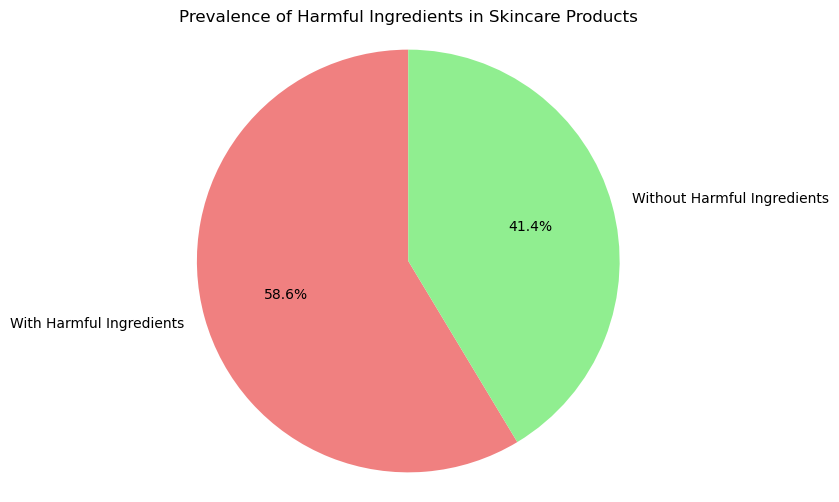

In [31]:
# Data for pie chart
total_products = 1472
harmful_products = 863
non_harmful_products = total_products - harmful_products

# Labels and sizes
labels = ['With Harmful Ingredients', 'Without Harmful Ingredients']
sizes = [harmful_products, non_harmful_products]
colors = ['lightcoral', 'lightgreen']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Prevalence of Harmful Ingredients in Skincare Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Sentiment distribution in Skincare product

- **Sentiment distribution with harmful ingredients:** 
    - Positive:    74.04%
    - Neutral:     23.64%
    - Negative:     2.32%
    

- **Sentiment distribution without harmful ingredients:**
    - Positive:     80.30%
    - Neutral:      17.90%
    - Negative:      1.81%

The data shows that products without harmful ingredients tend to have a higher proportion of positive sentiment and a lower proportion of neutral and negative sentiments compared to products with harmful ingredients.

The sentiment analysis reveals significant differences between products with and without harmful ingredients. Products without harmful ingredients tend to receive more positive reviews (80.30%) compared to those with harmful ingredients (74.04%). On the other hand, products with harmful ingredients have a higher proportion of neutral (23.64%) and negative sentiments (2.32%) than those without harmful ingredients (17.90% neutral and 1.81% negative).

These findings suggest that the presence of harmful ingredients in skincare products can negatively impact consumer sentiment, leading to lower product ratings and potentially affecting brand reputation. Manufacturers should consider formulating products with safer ingredients to enhance consumer satisfaction and foster positive reviews.

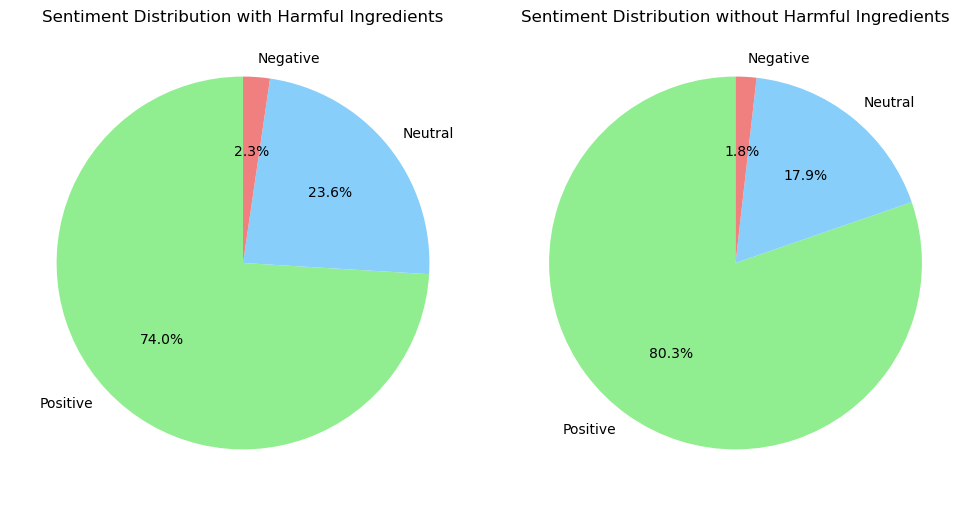

In [36]:
# Data for pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes_with_harmful = [74.044032, 23.638470, 2.317497]
sizes_without_harmful = [80.295567, 17.898194, 1.806240]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for products with harmful ingredients
ax1.pie(sizes_with_harmful, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightskyblue', 'lightcoral'])
ax1.set_title('Sentiment Distribution with Harmful Ingredients')

# Pie chart for products without harmful ingredients
ax2.pie(sizes_without_harmful, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightskyblue', 'lightcoral'])
ax2.set_title('Sentiment Distribution without Harmful Ingredients')

plt.tight_layout()
plt.show()